<a href="https://colab.research.google.com/github/nujl/Liberty-Data-Science/blob/main/5.Pokemon%20Unite%20Analysis/KR_Regional_Finals_Grand_Finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1. Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

%matplotlib inline

---
# 2. Data

In [2]:
# Grand Finals
df_gf = pd.read_csv("https://raw.githubusercontent.com/nujl/Liberty-Data-Science/main/5.Pokemon%20Unite%20Analysis/data/Poke%20Unite%20London%20Bound%20-%20KR%20Grand%20Finals.csv")
# Non Grand Finals
df_ngf = pd.read_csv("https://raw.githubusercontent.com/nujl/Liberty-Data-Science/main/5.Pokemon%20Unite%20Analysis/data/Poke%20Unite%20London%20Bound%20-%20Non%20GF%20KR.csv")

ALLPOKEMONS = ['Absol',
 'Aegislash',
 'Alolan_Ninetales',
 'Azumarill',
 'Blastoise',
 'Blissey',
 'Charizard',
 'Cinderace',
 'Cramorant',
 'Crustle',
 'Decidueye',
 'Dragonite',
 'Duraludon',
 'Eldegoss',
'Espeon',
 'Garchomp',
 'Gardevoir',
 'Gengar',
 'Greedent',
 'Greninja',
 'Hoopa',
 'Lucario',
 'Machamp',
 'Mamoswine',
 'Mr._Mime',
 'Pikachu',
 'Slowbro',
 'Snorlax',
 'Sylveon',
 'Talonflame',
 'Trevenant',
 'Tsareena',
 'Venusaur',
 'Wigglytuff',
 'Zeraora']

ALLPOKEMONS_KR = ['앱솔',
 '킬가르도',
 '알로라 나인테일',
 '마릴리',
 '거북왕',
 '해피너스',
 '리자몽',
 '에이스번',
 '윽우지',
 '암팰리스',
 '모크나이퍼',
 '망나뇽',
 '두랄루돈',
 '백솜모카',
'에브이',
 '한카리아스',
 '가디안',
 '팬텀',
 '요씽리스',
 '개굴닌자',
 '후파',
 '루카리오',
 '괴력몬',
 '맘모꾸리',
 '마임맨',
 '피카츄',
 '야도란',
 '잠만보',
 '님피아',
 '파이어로',
 '대로트',
 '달코퀸',
 '이상해꽃',
 '푸크린',
 '제라오라']

Grand Finals data only has 3 rows because Eternity got 3-0d by No Show. 

In [3]:
df_gf

,Team Blue,Team Red,BP1_PLAYER,BP2_PLAYER,BP3_PLAYER,BP4_PLAYER,BP5_PLAYER,RP1_PLAYER,RP2_PLAYER,RP3_PLAYER,...,RP5_DEATHS,DRED1,DRED2,DRED3,ROTOM1,ROTOM2,ROTOM3,ZAPDOS,FinalScoreBlue,FinalScoreRed
0,No Show,Eternity,S4L-,우치하상타치,월론,1st_Blossom,앙팡!,세준,루이_Louis,박잼준,...,3,BP3,RP3,NaN,BP4,NaN,NaN,BP3,756,503
1,Eternity,No Show,세준,루이_Louis,박잼준,헤론,디벨_Divel,S4L-,우치하상타치,월론,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,674
2,No Show,Eternity,S4L-,우치하상타치,월론,1st_Blossom,앙팡!,세준,루이_Louis,박잼준,...,3,NaN,RP1,NaN,NaN,NaN,NaN,BP4,677,355


In [4]:
df_ngf.head()

,Team Blue,Team Red,BP1_PLAYER,BP2_PLAYER,BP3_PLAYER,BP4_PLAYER,BP5_PLAYER,RP1_PLAYER,RP2_PLAYER,RP3_PLAYER,...,RP1_ATK,DRED1,DRED2,DRED3,ROTOM1,ROTOM2,ROTOM3,ZAPDOS,FinalScoreBlue,FinalScoreRed
0,Eternity,디엠단,세준,루이_Louis,박잼준,헤론,디벨_Divel,큐브피스,느지느,JJ_청주,...,52291,Blue,Blue,Red,Blue,Blue,None,Red,559,362
1,디엠단,Eternity,큐브피스,JuNE_,서남,JJ_청주,느지느,세준,루이_Louis,박잼준,...,33464,Red,Red,Blue,Blue,Blue,None,Red,333,757
2,No Show,NewMeta,S4L-,우치하상타치,월론,1st_Blossom,앙팡!,NaN,NaN,NaN,...,31179,Blue,Red,None,Red,Red,None,Red,217,450
3,New Meta,No Show,NaN,NaN,NaN,NaN,NaN,S4L-,우치하상타치,월론,...,42636,Red,Red,Red,Red,Blue,None,Blue,454,727
4,No Show,New Meta,S4L-,우치하상타치,월론,1st_Blossom,앙팡!,NaN,NaN,NaN,...,30305,Blue,Red,Blue,Red,Blue,None,Blue,750,31


### Columns
- (B/R) P (1,2,3,4,5): Pokemon
- (B/R) P (1,2,3,4,5)_PLAYER: Player
- (B/R) P (1,2,3,4,5)_HI: Held Items
- (B/R) P (1,2,3,4,5)_BI: Battle Items
- (B/R) P (1,2,3,4,5)_SCORE: Score
- (B/R) P (1,2,3,4,5)_KILLS: Number of Kills
- (B/R) P (1,2,3,4,5)_ASSISTS: Number of Assists
- (B/R) P (1,2,3,4,5)_ATK: Damage Dealt
- (B/R) P (1,2,3,4,5)_DEF: Damage Received
- (B/R) P (1,2,3,4,5)_HEAL: HP Healed
- (B/R) P (1,2,3,4,5)_DEATHS: Number of Deaths
- DRED, ROTOM, ZAPDOS: Player who stole Drednaw, Rotom, or Zapdos

In [5]:
df_gf.columns

Index(['Team Blue', 'Team Red', 'BP1_PLAYER', 'BP2_PLAYER', 'BP3_PLAYER',
       'BP4_PLAYER', 'BP5_PLAYER', 'RP1_PLAYER', 'RP2_PLAYER', 'RP3_PLAYER',
       ...
       'RP5_DEATHS', 'DRED1', 'DRED2', 'DRED3', 'ROTOM1', 'ROTOM2', 'ROTOM3',
       'ZAPDOS', 'FinalScoreBlue', 'FinalScoreRed'],
      dtype='object', length=141)

In [6]:
len(df_gf.columns)

141

---
# 3. Statistics
- KDA = (KILLS  +  ASSISTS)  /  DEATHS
- DF = 2 x KILLS + ASSISTS - 3 x DEATHS

In [7]:
def STATS(df, game_num, method):
    kda_dict = {}
    i = game_num - 1
    for TEAM in ["B", "R"]:
        for num in range(1, 6):
            k = df.iloc[i][f"{TEAM}P{num}_KILLS"]
            d = df.iloc[i][f"{TEAM}P{num}_DEATHS"]
            a = df.iloc[i][f"{TEAM}P{num}_ASSISTS"]
            poke = df.iloc[i][f"{TEAM}P{num}"]
            player = df.iloc[i][f"{TEAM}P{num}_PLAYER"]
            if method == "DF":
                if d == 0:
                    kda_dict[f"{player} | {poke}"] = [round((2*k)+a-3, 2), TEAM]
                else:
                    kda_dict[f"{player} | {poke}"] = [round(((2*k)+a-(3*d)) , 2), TEAM]
            elif method == "KDA":
                if d == 0:
                    kda_dict[f"{player} | {poke}"] = [round((k+a)), TEAM]
                else:
                    kda_dict[f"{player} | {poke}"] = [round((k+a)/d , 2), TEAM]
    
    return pd.DataFrame(kda_dict).transpose().reset_index().rename(columns={"index": "Pokemon", 0: method, 1:"TEAM"}).sort_values(by=method, ascending=False)

In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"
!mv "NotoSansCJKkr-Medium.otf" "/usr/share/fonts/truetype"

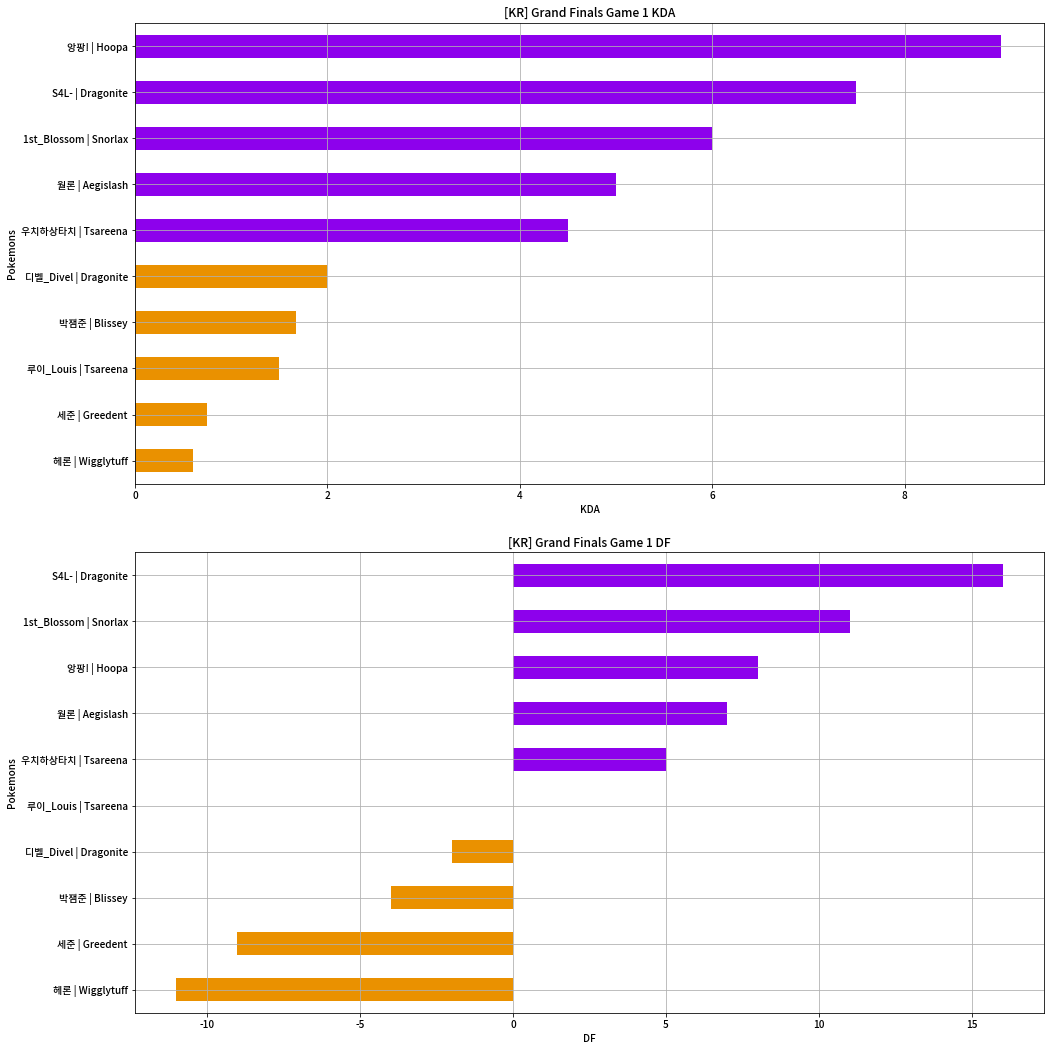

In [9]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import font_manager

font_path = "/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf" 
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

def KDA_graph(df, game_num):
    
    KDA = STATS(df_gf, game_num, "KDA")
    DF = STATS(df_gf, game_num, "DF")
    colors_KDA = ["#ea9100" if TEAM == "R" else "#8d01ec" for TEAM in KDA.TEAM ]    
    colors_DF = ["#ea9100" if TEAM == "R" else "#8d01ec" for TEAM in DF.TEAM ]    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    KDA.plot(
        x="Pokemon", 
        y="KDA", 
        kind="barh", 
        figsize=(30, 5), 
        ax=ax1,
        color = colors_KDA
    )
    DF.plot(
        x="Pokemon", 
        y="DF", 
        kind="barh", 
        figsize=(15, 15), 
        ax=ax2,
        color = colors_DF
    )

    ax1.invert_yaxis()
    ax1.set_ylabel("Pokemons")
    ax1.set_xlabel("KDA")
    ax1.set_title(f"[KR] Grand Finals Game {game_num} KDA")
    ax2.invert_yaxis()
    ax2.set_ylabel("Pokemons")
    ax2.set_xlabel("DF")
    ax2.set_title(f"[KR] Grand Finals Game {game_num} DF")
    plt.rcParams.update({'font.size': 20})
    plt.rcParams['axes.unicode_minus'] = False
    plt.tight_layout()
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.grid(True)
    ax2.grid(True)

KDA_graph(df_gf, 1)
    

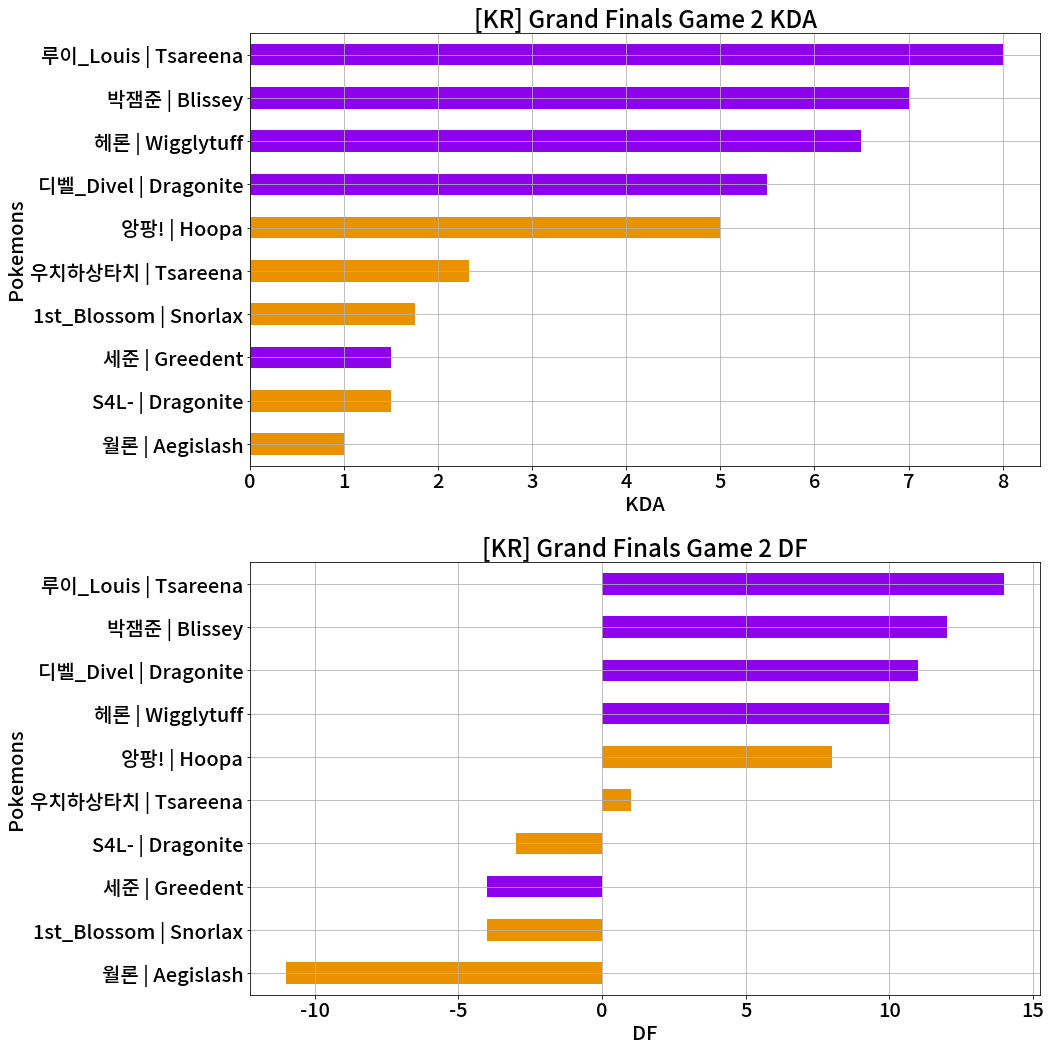

In [10]:
KDA_graph(df_gf, 2)

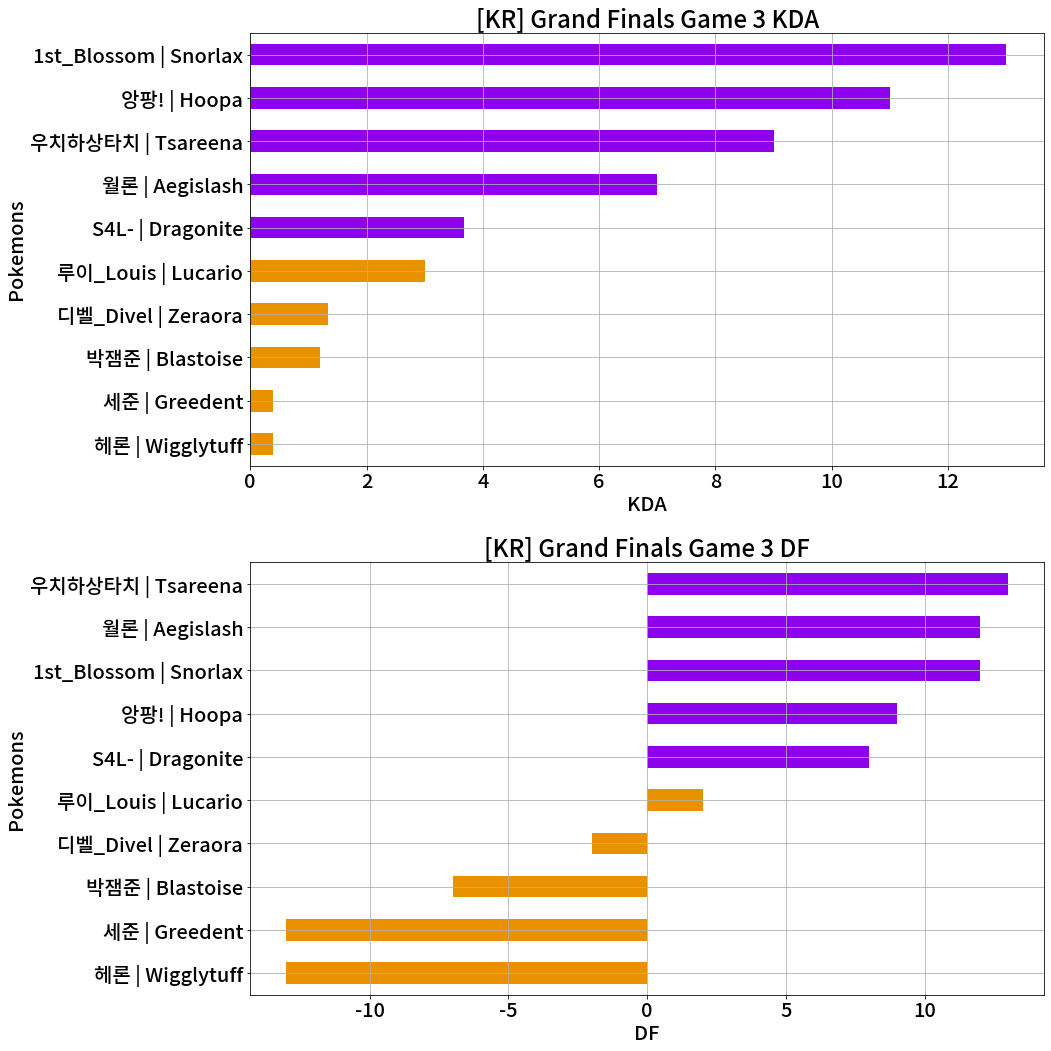

In [11]:
KDA_graph(df_gf, 3)

---
# 4. Comps and Builds

In [12]:
def battle_items_list_creator(df):
    pokemon_columns = ['BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'RP1',
       'RP2', 'RP3', 'RP4', 'RP5']
    
    for poke in pokemon_columns:
        df[f"{poke}_BI_LIST"] = 0
    for i in range(df.shape[0]):
        for poke in pokemon_columns:
            df[f"{poke}_BI_LIST"].iloc[i] = tuple(sorted([df.loc[i, f"{poke}_BI1"], df.loc[i, f"{poke}_BI2"], df.loc[i, f"{poke}_BI3"]]))

    df.drop(['BP1_BI1', 'BP1_BI2', 'BP1_BI3', 'BP2_BI1',
       'BP2_BI2', 'BP2_BI3', 'BP3_BI1', 'BP3_BI2', 'BP3_BI3', 'BP4_BI1',
       'BP4_BI2', 'BP4_BI3', 'BP5_BI1', 'BP5_BI2', 'BP5_BI3', 'RP1_BI1',
       'RP1_BI2', 'RP1_BI3', 'RP2_BI1', 'RP2_BI2', 'RP2_BI3', 'RP3_BI1',
       'RP3_BI2', 'RP3_BI3', 'RP4_BI1', 'RP4_BI2', 'RP4_BI3', 'RP5_BI1',
       'RP5_BI2', 'RP5_BI3'], axis=1, inplace=True)
    
    return df
    

def COMPS(dfs, team):
    cols = ['S1', 'S2', 'S3','S4', 'S5', 
               'P1', 'P2', 'P3', 'P4', 'P5', 
               'P1_HI', 'P2_HI', 'P3_HI', 'P4_HI','P5_HI',
               'P1_BI_LIST', 'P2_BI_LIST', 'P3_BI_LIST','P4_BI_LIST', 'P5_BI_LIST' 
              ]
    groupby_col_B = ['BP1_PLAYER', 'BP2_PLAYER', 'BP3_PLAYER','BP4_PLAYER', 'BP5_PLAYER', 
                   'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 
                   'BP1_HI', 'BP2_HI', 'BP3_HI', 'BP4_HI','BP5_HI',
                   'BP1_BI_LIST', 'BP2_BI_LIST', 'BP3_BI_LIST','BP4_BI_LIST', 'BP5_BI_LIST' 
                  ]

    groupby_col_R = ['RP1_PLAYER', 'RP2_PLAYER', 'RP3_PLAYER','RP4_PLAYER', 'RP5_PLAYER', 
                   'RP1', 'RP2', 'RP3', 'RP4', 'RP5', 
                   'RP1_HI', 'RP2_HI', 'RP3_HI', 'RP4_HI','RP5_HI',
                   'RP1_BI_LIST', 'RP2_BI_LIST', 'RP3_BI_LIST','RP4_BI_LIST', 'RP5_BI_LIST' 
                  ]

    rows = []
    
    for df in dfs:
        for i in range(df.shape[0]):
            if df.iloc[i]["Team Blue"] == team:
                rows.append(df.iloc[i][groupby_col_B].values)
            elif df.iloc[i]["Team Red"] == team:
                rows.append(df.iloc[i][groupby_col_R].values)

    team_df = pd.DataFrame(rows, columns = cols)
    comps = []
    builds = []
    for i in range(1, 6):
        builds.append(team_df[[f"S{i}", f"P{i}", f"P{i}_BI_LIST", f"P{i}_HI"]].value_counts())
    for i in range(team_df.shape[0]):
        comps.append(list(team_df.iloc[i][["P1", "P2", "P3", "P4", "P5"]]))
    
    builds = pd.DataFrame(builds).transpose().fillna(0)
    counts = [int(sum(builds.iloc[i])) for i in range(builds.shape[0])]
    builds["Count"] = counts
    builds.drop([0,1,2,3,4], axis=1, inplace=True)

    return builds, pd.Series(comps).value_counts().rename_axis('unique_values').to_frame('counts')

In [ ]:
clean_df_ngf = df_ngf.copy()
clean_df_ngf = battle_items_list_creator(clean_df_ngf)
clean_df_gf = df_gf.copy()
clean_df_gf = battle_items_list_creator(clean_df_gf)

### Eternity: Builds of each player

In [14]:
builds_eternity, comps_eternity = COMPS([clean_df_gf, clean_df_ngf], "Eternity")
builds_eternity

Count
디벨_Divel Dragonite  (Focus Band, Muscle Band, Razor Claw)            Eject Button      1
                                                                     Full Heal        11
         Zeraora    (Buddy Barrier, Focus Band, Muscle Band)         Fluffy Tail       2
루이_Louis Lucario    (Buddy Barrier, Focus Band, Weakness Policy)     Fluffy Tail       1
                    (Focus Band, Score Shield, Weakness Policy)      Fluffy Tail       1
         Tsareena   (Attack Weight, Focus Band, Weakness Policy)     Full Heal        11
                                                                     X Speed           1
박잼준      Blastoise  (Buddy Barrier, Energy Amplifier, Focus Band)    Fluffy Tail       1
                    (Buddy Barrier, Energy Amplifier, Sp. Atk Specs) Fluffy Tail       1
         Blissey    (Buddy Barrier, Choice Specs, Focus Band)        X Speed           8
                    (Buddy Barrier, Exp. Share, Focus Band)          X Speed           4
세준       Greedent   (Buddy Barrier, Focus Band, Score Shield)        Fluffy Tail      14
헤론       Wigglytuff (Buddy Barrier, Focus Band, Score Shield)        Eject Button     14

### Team Compositions of Eternity

In [15]:
comps_eternity

,counts
unique_values,
"[Greedent, Tsareena, Blissey, Wigglytuff, Dragonite]",12
"[Greedent, Lucario, Blastoise, Wigglytuff, Zeraora]",2


### No Show: Builds of each player

In [16]:
builds_noshow, comps_noshow = COMPS([clean_df_gf, clean_df_ngf], "No Show")

builds_noshow

Count
1st_Blossom Hoopa     (Buddy Barrier, Focus Band, Muscle Band)     X Speed           1
            Snorlax   (Buddy Barrier, Focus Band, Muscle Band)     X Speed          10
S4L-        Dragonite (Focus Band, Muscle Band, Razor Claw)        Full Heal         6
                                                                   X Attack          2
                                                                   X Speed           1
            Greninja  (Attack Weight, Focus Band, Muscle Band)     X Attack          2
앙팡!         Blissey   (Buddy Barrier, Focus Band, Rocky Helmet)    X Speed           1
            Hoopa     (Buddy Barrier, Focus Band, Muscle Band)     Eject Button      9
                      (Buddy Barrier, Focus Band, Rocky Helmet)    X Speed           1
우치하상타치      Tsareena  (Attack Weight, Focus Band, Weakness Policy) Full Heal         2
                                                                   X Attack          8
                                                                   X Speed           1
월론          Aegislash (Focus Band, Muscle Band, Razor Claw)        Full Heal         3
                                                                   Potion            8

### Team Compositions of No Show

In [17]:
comps_noshow

,counts
unique_values,
"[Dragonite, Tsareena, Aegislash, Snorlax, Hoopa]",8
"[Greninja, Tsareena, Aegislash, Snorlax, Hoopa]",2
"[Dragonite, Tsareena, Aegislash, Hoopa, Blissey]",1


# 5. Star Player Calculation System
- Dominance + Survivability + Score + Points for Objectives Steals
> - Dominance: (Multiplier x Kills + Assists) x (Damage Dealed/100000)
> - Survivability: (Multiplier x Damage Received + 1.5 x HP Healed) / (Deaths/10000)
> - Score: Individual Score^1.8 / Team Score
> - Objective Steal Points: First Drednaw: 6 // Second Drednaw: 5 // Third Drednaw: 4 // First Rotom: 3.5 // Second Rotom: 4.5 // Third Rotom: 5.5 // Zapdos: 8


In [18]:
def pu_type(pokemon):
    """ Returns type, dom_mul, surv_mult """
    Speedster = ['Absol', 'Gengar', 'Talonflame', 'Zeraora']
    Attacker = ['Alolan_Ninetales', 'Cinderace', 'Cramorant', 'Decidueye', 'Delphox', 'Duraludon', 'Espeon', 'Gardevoir', 'Greninja', 'Pikachu', 'Sylveon']
    All_Rounder = ['Aegislash', 'Azumarill', 'Charizard', 'Dragonite', 'Garchomp', 'Lucario', 'Machamp', 'Tsareena']
    Supporter = ['Blissey', 'Eldegoss', 'Wigglytuff', 'Hoopa', 'Mr._Mime']
    Defender = ["Blastoise", 'Crustle', 'Greedent', 'Mamoswine', 'Slowbro', 'Snorlax', 'Trevenant']
    
    if pokemon in Speedster: return "Speedster", 1.5, 3
    elif pokemon in Attacker: return "Attacker", 1.875, 2.625
    elif pokemon in All_Rounder: return "All-Rounder", 2.25, 2.25
    elif pokemon in Defender: return "Defender", 2.625, 1.875
    elif pokemon in Supporter: return "Supporter", 3, 1.5
    
def get_dominance(num, poke, constant): 
    k = df_gf.iloc[num][f"{poke}_KILLS"]
    a = df_gf.iloc[num][f"{poke}_ASSISTS"]
    atk = df_gf.iloc[num][f"{poke}_ATK"]
    stat = round((constant*k+a) * (atk/100000), 2)
    return stat

def get_survivability(num, poke, constant):
    de = df_gf.iloc[num][f"{poke}_DEATHS"]
    df = df_gf.iloc[num][f"{poke}_DEF"]
    h = df_gf.iloc[num][f"{poke}_HEAL"]
    if de == 0:
        stat = round((constant*df + h)/1/10000, 2)
    else:
        stat = round((constant*df + h)/de/10000, 2)
    
    return stat

def get_score(num, poke):
    btotal = df_gf.iloc[num]["FinalScoreBlue"]
    rtotal = df_gf.iloc[num]["FinalScoreRed"]
    if poke[0] == "B":
        score = round(df_gf.iloc[num][f"{poke}_SCORE"] ** 1.8 / btotal, 3)
    else:
        score = round(df_gf.iloc[num][f"{poke}_SCORE"] ** 1.8 / rtotal, 3)
    return score
    
def objectives(num, poke):
    objs_scores_list = []
    for obj in ["DRED1", "DRED2", "DRED3", "ROTOM1", "ROTOM2", "ROTOM3", "ZAPDOS"]:
        if df_gf.iloc[num][obj] == poke:
            if obj == "DRED1":
                objs_scores_list.append(6)
            elif obj == "DRED2":
                objs_scores_list.append(5)
            elif obj == "DRED3":
                objs_scores_list.append(4)
            elif obj == "ROTOM1":
                objs_scores_list.append(3.5)
            elif obj == "ROTOM2":
                objs_scores_list.append(4.5)
            elif obj == "ROTOM3":
                objs_scores_list.append(5.5)
            elif obj == "ZAPDOS":
                objs_scores_list.append(8)
    return objs_scores_list

def objs_transfer(nums):
    objs = []
    for i in nums:
        if i == 6: objs.append("First Drednaw")
        elif i == 5: objs.append("Second Drednaw")
        elif i == 4: objs.append("Third Drednaw")
        elif i == 3.5: objs.append("First Rotom")
        elif i == 4.5: objs.append("Second Rotom")
        elif i == 5.5: objs.append("Third Rotom")
        elif i == 8: objs.append("Zapdos")
    if len(objs)!= 0: return objs
        
def mvp_score(num, poke, dom_constant, surv_constant, score_divider):
    dom = get_dominance(num, poke, dom_constant)
    surv = get_survivability(num, poke, surv_constant)
#     score = df_gf.iloc[num][f"{poke}_SCORE"]/score_divider
    score = get_score(num, poke) / score_divider
    objs = objectives(num, poke)
    mvp = round(dom + surv + score + sum(objs), 2)
    return mvp, dom, surv, score, objs, [f"{round(100*metr/mvp, 3)}" for metr in [dom, surv, score]]

def mvp_graph(num, score_divider):
    mvp_graph_list = []
    pokemon_columns = ['BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'RP1','RP2', 'RP3', 'RP4', 'RP5']
    for poke in pokemon_columns:
        ptype = ""
        ptype, dom_constant, surv_constant = pu_type(df_gf.iloc[num][poke])
        mvps, dom, surv, score, objs_list, ratio_list = mvp_score(num, poke, dom_constant, surv_constant, score_divider)
        objs = objs_transfer(objs_list)
        if poke[0] == "B":
            identification = f"{df_gf.iloc[num]['Team Blue']} | {df_gf.iloc[num][f'{poke}_PLAYER']} | {df_gf.iloc[num][poke]}"
        elif poke[0] == "R":
            identification = f"{df_gf.iloc[num]['Team Red']} | {df_gf.iloc[num][f'{poke}_PLAYER']} | {df_gf.iloc[num][poke]}"
        mvp_graph_list.append([identification, mvps, dom, surv, int(sum(objs_list)), round(score,3), objs, float(ratio_list[0]), float(ratio_list[1]), float(ratio_list[2])])
    mvp_graph = pd.DataFrame(mvp_graph_list, columns=["Pokemon", "MVP Score", "Dominance", "Survivability", "Objectives Points", "Score", "Objectives Steals", "Dom%", "Surv%", "Score%"])
    mvp_graph.style.set_caption("MVP Scores")
    mvp_graph.sort_values(by=["MVP Score"], axis=0, inplace=True, ascending=False)
    return mvp_graph

g0 = mvp_graph(0, 1)
g1 = mvp_graph(1, 1)
g2 = mvp_graph(2, 1)

In [19]:
# Game 1
g0

,Pokemon,MVP Score,Dominance,Survivability,Objectives Points,Score,Objectives Steals,Dom%,Surv%,Score%
2,No Show | 월론 | Aegislash,39.33,6.11,5.68,14,13.542,"[First Drednaw, Zapdos]",15.535,14.442,34.432
0,No Show | S4L- | Dragonite,37.19,20.09,4.69,0,12.410,None,54.020,12.611,33.369
1,No Show | 우치하상타치 | Tsareena,24.93,7.24,4.58,0,13.112,None,29.041,18.371,52.595
3,No Show | 1st_Blossom | Snorlax,24.59,5.43,5.51,3,10.152,[First Rotom],22.082,22.407,41.285
6,Eternity | 루이_Louis | Tsareena,20.13,7.71,3.63,0,8.790,None,38.301,18.033,43.666
5,Eternity | 세준 | Greedent,18.91,0.86,4.28,0,13.766,None,4.548,22.634,72.797
4,No Show | 앙팡! | Hoopa,16.55,5.72,5.94,0,4.893,None,34.562,35.891,29.565
9,Eternity | 디벨_Divel | Dragonite,14.62,3.81,2.89,0,7.915,None,26.060,19.767,54.138
7,Eternity | 박잼준 | Blissey,14.60,0.95,2.74,5,5.907,[Second Drednaw],6.507,18.767,40.459
8,Eternity | 헤론 | Wigglytuff,8.43,1.72,1.88,0,4.829,None,20.403,22.301,57.284


In [20]:
# Game 2
g1

,Pokemon,MVP Score,Dominance,Survivability,Objectives Points,Score,Objectives Steals,Dom%,Surv%,Score%
6,No Show | 우치하상타치 | Tsareena,30.27,7.41,3.93,0,18.932,None,24.480,12.983,62.544
4,Eternity | 디벨_Divel | Dragonite,26.27,11.96,4.61,0,9.700,None,45.527,17.549,36.924
2,Eternity | 박잼준 | Blissey,24.52,8.03,3.64,0,12.853,None,32.749,14.845,52.418
5,No Show | S4L- | Dragonite,23.08,5.95,3.21,0,13.920,None,25.780,13.908,60.312
1,Eternity | 루이_Louis | Tsareena,20.20,13.67,6.07,0,0.464,None,67.673,30.050,2.297
9,No Show | 앙팡! | Hoopa,17.11,7.19,4.01,0,5.907,None,42.022,23.437,34.524
7,No Show | 월론 | Aegislash,14.86,3.92,2.49,0,8.449,None,26.380,16.756,56.857
3,Eternity | 헤론 | Wigglytuff,14.68,9.19,4.96,0,0.535,None,62.602,33.787,3.644
8,No Show | 1st_Blossom | Snorlax,11.86,2.76,3.19,0,5.907,None,23.272,26.897,49.806
0,Eternity | 세준 | Greedent,7.85,3.11,4.56,0,0.176,None,39.618,58.089,2.242


In [21]:
# Game 3
g2

,Pokemon,MVP Score,Dominance,Survivability,Objectives Points,Score,Objectives Steals,Dom%,Surv%,Score%
3,No Show | 1st_Blossom | Snorlax,34.67,5.34,10.42,8,10.915,[Zapdos],15.402,30.055,31.483
1,No Show | 우치하상타치 | Tsareena,33.15,11.39,10.98,0,10.776,None,34.359,33.122,32.507
0,No Show | S4L- | Dragonite,32.50,13.85,4.01,0,14.642,None,42.615,12.338,45.052
2,No Show | 월론 | Aegislash,31.48,10.22,7.56,0,13.703,None,32.465,24.015,43.529
6,Eternity | 루이_Louis | Lucario,20.96,3.54,3.89,0,13.532,None,16.889,18.559,64.561
5,Eternity | 세준 | Greedent,20.04,0.56,3.67,5,10.814,[Second Drednaw],2.794,18.313,53.962
7,Eternity | 박잼준 | Blastoise,10.62,5.55,2.08,0,2.992,None,52.260,19.586,28.173
8,Eternity | 헤론 | Wigglytuff,10.32,0.67,2.14,0,7.505,None,6.492,20.736,72.723
4,No Show | 앙팡! | Hoopa,10.23,4.23,5.33,0,0.673,None,41.349,52.102,6.579
9,Eternity | 디벨_Divel | Zeraora,6.59,2.31,3.77,0,0.512,None,35.053,57.208,7.769


# 6. Thoughts
> Unite doesn't report the number of deaths nor use a functioning MVP calculation system, so I tried to make one using some variables. [This](https://www.reddit.com/r/PokemonUnite/comments/vjekx8/korea_world_championship_qualifying_teams_no_show/) is my analysis of the Korean Grand Finals of the Regional Finals of Pokemon Unite, thank you.